In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment',None)

In [2]:
df = pd.read_excel("./sample/2015_7차_직접측정 데이터.xlsx")

In [3]:
ndf = df[['ⓞ_02_성별', 'ⓞ_06_나이_반올림', '①_003_키', '①_102_손직선길이', '①_119_발직선길이']]
ndf.head()

,ⓞ_02_성별,ⓞ_06_나이_반올림,①_003_키,①_102_손직선길이,①_119_발직선길이
0,남,25,1736.0,177.0,228.0
1,남,28,1833.0,195.0,269.0
2,남,19,1744.0,186.0,244.0
3,남,20,1751.0,178.0,231.0
4,남,22,1851.0,190.0,265.0


In [4]:
ndf.info()
ndf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ⓞ_02_성별      6420 non-null   object 
 1   ⓞ_06_나이_반올림  6420 non-null   int64  
 2   ①_003_키      6419 non-null   float64
 3   ①_102_손직선길이  6417 non-null   float64
 4   ①_119_발직선길이  6416 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 250.9+ KB


,ⓞ_06_나이_반올림,①_003_키,①_102_손직선길이,①_119_발직선길이
count,6420.000000,6419.000000,6417.000000,6416.000000
mean,31.366667,1654.465337,175.116877,243.350530
std,14.385176,89.400218,10.226231,15.199575
min,15.000000,1354.000000,144.000000,192.000000
25%,19.000000,1585.000000,168.000000,232.000000
50%,27.000000,1653.000000,175.000000,242.000000
75%,40.000000,1723.000000,182.000000,255.000000
max,69.000000,1915.000000,215.000000,296.000000


In [5]:
ndf['①_003_키'].replace('?', np.nan, inplace=True)
ndf.dropna(subset=['①_003_키'],axis=0,inplace=True)

ndf['①_102_손직선길이'].replace('?', np.nan, inplace=True)
ndf.dropna(subset=['①_102_손직선길이'],axis=0,inplace=True)

ndf['①_119_발직선길이'].replace('?', np.nan, inplace=True)
ndf.dropna(subset=['①_119_발직선길이'],axis=0,inplace=True)

In [6]:
ndf.info()
ndf.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6416 entries, 0 to 6419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ⓞ_02_성별      6416 non-null   object 
 1   ⓞ_06_나이_반올림  6416 non-null   int64  
 2   ①_003_키      6416 non-null   float64
 3   ①_102_손직선길이  6416 non-null   float64
 4   ①_119_발직선길이  6416 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 300.8+ KB


,ⓞ_06_나이_반올림,①_003_키,①_102_손직선길이,①_119_발직선길이
count,6416.000000,6416.000000,6416.000000,6416.000000
mean,31.369389,1654.435630,175.115025,243.350530
std,14.388045,89.410076,10.225952,15.199575
min,15.000000,1354.000000,144.000000,192.000000
25%,19.000000,1585.000000,168.000000,232.000000
50%,27.000000,1653.000000,175.000000,242.000000
75%,40.000000,1723.000000,182.000000,255.000000
max,69.000000,1915.000000,215.000000,296.000000


In [7]:
grouped_ndf = ndf.groupby(['ⓞ_02_성별'])
df_male = grouped_ndf.get_group('남')
df_female = grouped_ndf.get_group('여')

In [8]:
df_male
df_female

,ⓞ_02_성별,ⓞ_06_나이_반올림,①_003_키,①_102_손직선길이,①_119_발직선길이
44,여,20,1560.0,160.0,216.0
45,여,31,1544.0,159.0,202.0
46,여,19,1600.0,170.0,221.0
47,여,21,1656.0,179.0,235.0
48,여,55,1661.0,177.0,238.0
...,...,...,...,...,...
6415,여,20,1706.0,178.0,242.0
6416,여,20,1624.0,164.0,241.0
6417,여,44,1508.0,173.0,228.0
6418,여,20,1574.0,166.0,222.0


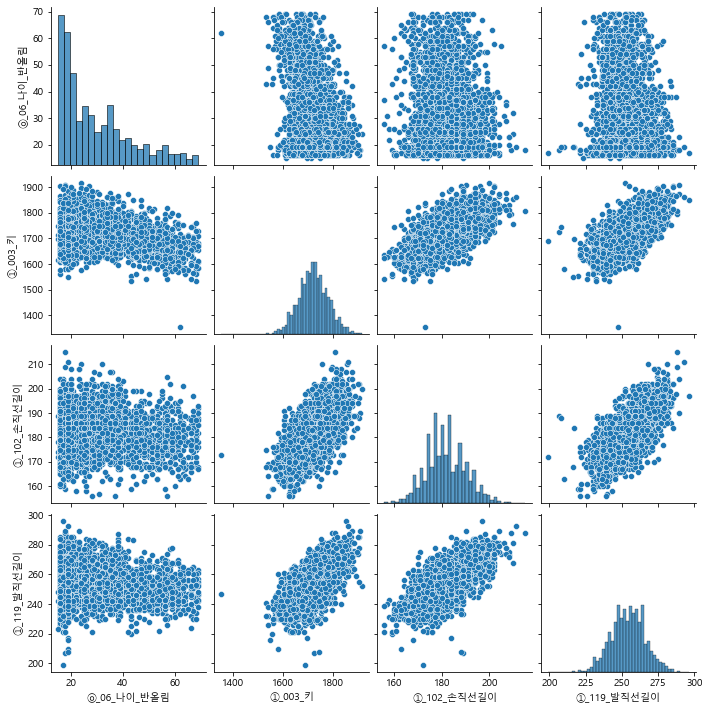

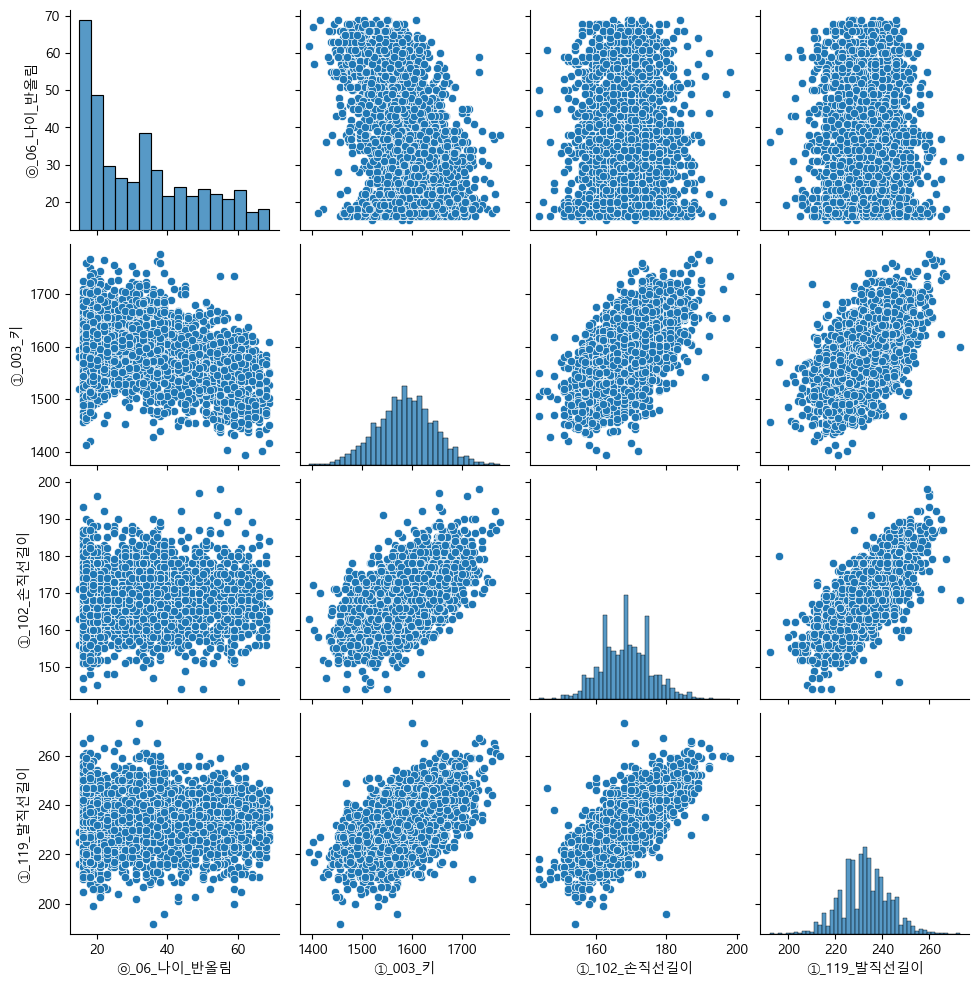

In [9]:
from matplotlib import font_manager, rc
font_path = "./sample/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sns.pairplot(df_male)
plt.show()
plt.close()

sns.pairplot(df_female)
plt.show()
plt.close()

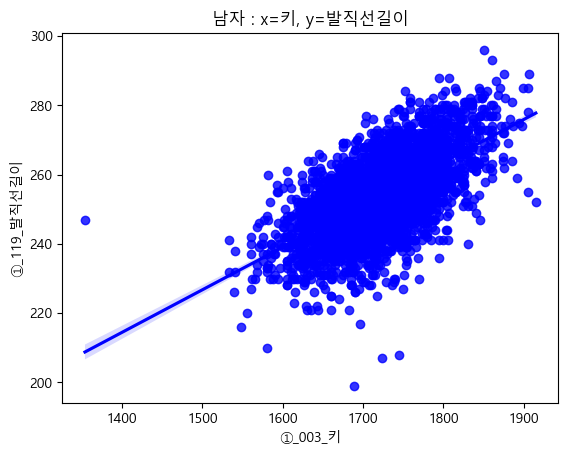

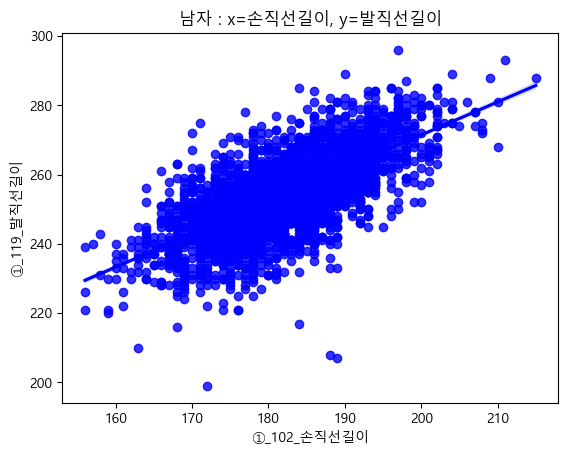

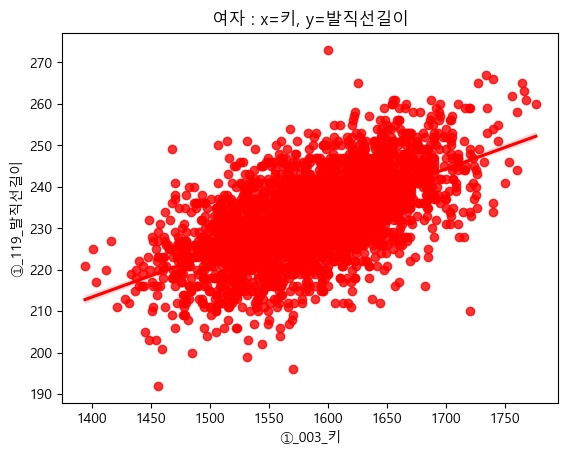

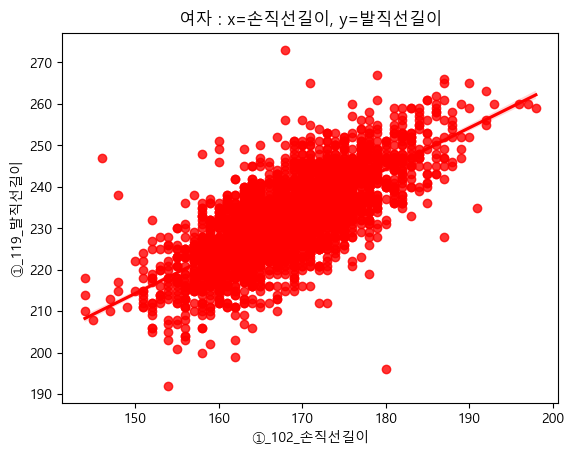

In [10]:
sns.regplot(x=df_male['①_003_키'], y=df_male['①_119_발직선길이'], color='blue')
plt.title("남자 : x=키, y=발직선길이")
plt.show()
plt.close()

sns.regplot(x=df_male['①_102_손직선길이'], y=df_male['①_119_발직선길이'], color='blue')
plt.title("남자 : x=손직선길이, y=발직선길이")
plt.show()
plt.close()

sns.regplot(x=df_female['①_003_키'], y=df_female['①_119_발직선길이'], color='red')
plt.title("여자 : x=키, y=발직선길이")
plt.show()
plt.close()

sns.regplot(x=df_female['①_102_손직선길이'], y=df_female['①_119_발직선길이'], color='red')
plt.title("여자 : x=손직선길이, y=발직선길이")
plt.show()
plt.close()

In [16]:
X_male=df_male[['①_003_키']]
Y_male=df_male['①_119_발직선길이']

X_female=df_female[['①_003_키']]
Y_female=df_female['①_119_발직선길이']

from sklearn.model_selection import train_test_split

X_train_male, X_test_male, Y_train_male, Y_test_male = train_test_split(X_male,Y_male,test_size=0.3, random_state=10)

print('남자 데이터 셋 train data 개수: ', len(X_train_male))
print('남자 데이터 셋 test data 개수: ', len(X_test_male))

X_train_female, X_test_female, Y_train_female, Y_test_female = train_test_split(X_female,Y_female,test_size=0.3, random_state=10)

print('여자 데이터 셋 train data 개수: ', len(X_train_female))
print('여자 데이터 셋 test data 개수: ', len(X_test_female))

남자 데이터 셋 train data 개수:  2234
남자 데이터 셋 test data 개수:  958
여자 데이터 셋 train data 개수:  2256
여자 데이터 셋 test data 개수:  968


In [17]:
from sklearn.linear_model import LinearRegression

lr_male = LinearRegression()
lr_female = LinearRegression()

남자 데이터 셋 학습 결과 : 
결정계수(R-제곱) :  0.4037978298450948
기울기 a:  [0.12216673] y절편 b 43.57719926686491


남자 데이터셋에 대한 회귀식 Y =  [0.12216673] X +  43.57719926686491


여자 데이터 셋 학습 결과 : 
결정계수(R-제곱) :  0.34226723392777747
기울기 a:  [0.10456377] y절편 b 66.81867074416687


여자 데이터셋에 대한 회귀식 Y =  [0.10456377] X +  66.81867074416687




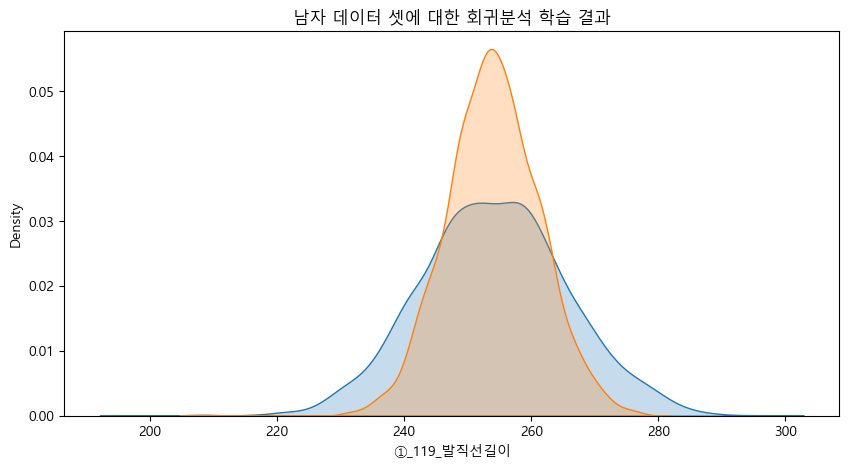

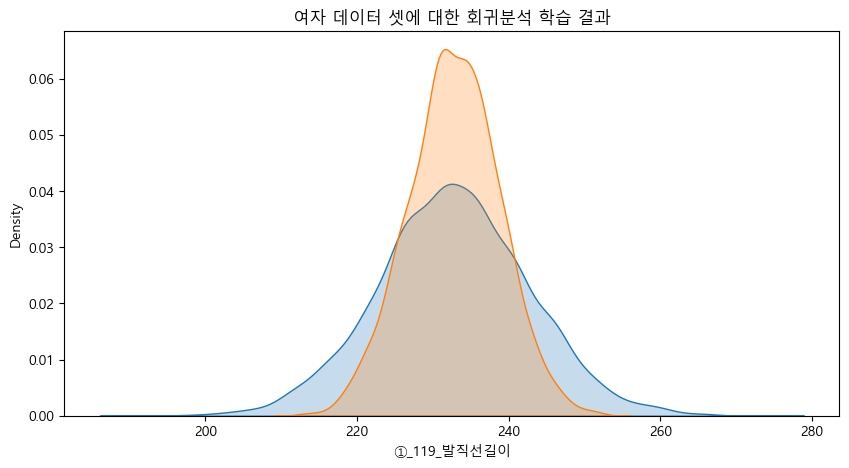

In [18]:
lr_male.fit(X_train_male, Y_train_male)
lr_female.fit(X_train_female, Y_train_female)

r_square_male = lr_male.score(X_test_male, Y_test_male)
r_square_female = lr_female.score(X_test_female, Y_test_female)

print("남자 데이터 셋 학습 결과 : ")
print("결정계수(R-제곱) : ", r_square_male)
print('기울기 a: ', lr_male.coef_, 'y절편 b', lr_male.intercept_)
print('\n')

print("남자 데이터셋에 대한 회귀식 Y = ", lr_male.coef_,"X + ", lr_male.intercept_)
print('\n')

print("여자 데이터 셋 학습 결과 : ")
print("결정계수(R-제곱) : ", r_square_female)
print('기울기 a: ', lr_female.coef_, 'y절편 b', lr_female.intercept_)
print('\n')

print("여자 데이터셋에 대한 회귀식 Y = ", lr_female.coef_,"X + ", lr_female.intercept_)
print('\n')

y_hat_male = lr_male.predict(X_male)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(Y_male, shade=True)
ax2 = sns.kdeplot(y_hat_male,shade=True)
plt.title("남자 데이터 셋에 대한 회귀분석 학습 결과")
plt.show()
plt.close()


y_hat_female = lr_female.predict(X_female)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(Y_female, shade=True)
ax2 = sns.kdeplot(y_hat_female,shade=True)
plt.title("여자 데이터 셋에 대한 회귀분석 학습 결과")
plt.show()
plt.close()

In [22]:
def get_foot_size_for_male(height):
    return 0.96846127*height + 78.03875968054149

def get_foot_size_for_femaile(height):
    return 1.02446775 * height + 60.1240070332976

stop = 'n'

while(stop=='n'):
    gender = input("성별(남 또는 여)을 입력하세요 : ")
    height = input("키를 입력하세요(cm단위) : ")
    if gender == '남':
        print("발 크기는 ", get_foot_size_for_male(float(height)), "cm로 예상됩니다.")
    else:
        print("발 크기는 ", get_foot_size_for_femaile(float(height)), "cm로 예상됩니다.")
    stop = input("끝낼까요?(y/n) : ")


발 크기는  245.5825593905415 cm로 예상됩니다.
